# Recipe Recommendation System: Data Preparation and Initial EDA

This project aims to build a personalized recipe recommendation system using the `Food.com Recipes and Interactions` dataset from Kaggle. The dataset contains detailed information about recipes, including ingredients, nutritional values, and user ratings. 

This notebook focuses on the first step in the pipeline: preparing and exploring the data. It is the foundation for creating clean and feature-rich datasets to be used in subsequent analysis and modeling. This is the first of multiple notebooks in the project.

### Objectives:
1. Preprocess and clean the dataset.
2. Handle outliers and convert data to appropriate formats.
3. Perform initial exploratory data analysis (EDA).
4. Generate a cleaned dataset and an additional feature-enriched dataset for further analysis.

### Outline:
- Importing libraries and loading the dataset.
- Cleaning and preprocessing the data:
  - Handling outliers.
  - Converting object data types to appropriate formats.
  - Adding new features from existing columns.
- Conducting initial exploratory data analysis (EDA).
- Generating and saving two datasets:
  - A cleaned version of the original dataset.
  - A feature-enriched dataset for use in subsequent analysis and modeling.


In [1]:
# import the necessary libraries
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [2]:
# load the dataset into memory
# First dataframe
recipe_df = pd.read_csv("C:/Users/pd006/Desktop/internship_search/machine_learning/Recipe-Recommender-System/data/RAW_recipes.csv")

Let us start exploring the `recipe_df`

In [3]:
recipe_df.head(3)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13


Right off the bat, we can see that there are entries in the form of texts, numbers, dates and collections of some combinations of those. Now let us see the dimension of the dataset.

In [4]:
# get the shape of the dataframe
recipe_df.shape    # (num_rows, num_cols)

(231637, 12)

We see that the dataset has more than 231000 rows and only 12 columns. This means that we will have a better representation of the pupolation and that the models trained on this data will be flexible which will give better predictions. 

Next thig we can do is check if there are ny null values in the dataset. We will use `isnull()` method for pandas. 

In [5]:
# check for null values
recipe_df.isnull().sum()

name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

We have null values in `name` and `description` columns. 

In [6]:
# Percentage of the missing values
missing_name_percent = recipe_df["name"].isnull().mean()*100
missing_description_percent = recipe_df["description"].isnull().mean()*100

print(f"The name column has {missing_name_percent:.4f}% missing value and the description column has {missing_description_percent:.4f}% missing values.")

The name column has 0.0004% missing value and the description column has 2.1495% missing values.


Let us start with the name column. We will perform boolean masking/indexing to get the True/False values for the entry with null value.

In [7]:
# condition
null_value_in_name_col = recipe_df["name"].isnull()

Now we will filter the dataframe based in the condition above.

In [8]:
recipe_df[null_value_in_name_col]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
721,NaN,368257,10,779451,2009-04-27,"['15-minutes-or-less', 'time-to-make', 'course...","[1596.2, 249.0, 155.0, 0.0, 2.0, 112.0, 14.0]",6,"['in a bowl , combine ingredients except for o...",-------------,"['lemon', 'honey', 'horseradish mustard', 'gar...",10


Let us drop this entry from the dataframe.

In [9]:
# drop the null value
recipe_df.drop(index=[721], inplace = True)

In [10]:
# Sanity check
recipe_df.isnull().sum()

name                 0
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

We have successfully dropped the entry with null value from our dataframe. Now we will perform the boolean masking operation again to grab entries that have `NaN` values in the `description` column in the dataframe.

In [11]:
# condition
null_values_in_description_col = recipe_df["description"].isnull()

In [12]:
# filter, get the index and drop the entries.
idx_for_null_in_description_col = recipe_df[null_values_in_description_col].index
recipe_df.drop(index = idx_for_null_in_description_col, inplace = True)

In [13]:
# Sanity check
recipe_df.isnull().sum()

name              0
id                0
minutes           0
contributor_id    0
submitted         0
tags              0
nutrition         0
n_steps           0
steps             0
description       0
ingredients       0
n_ingredients     0
dtype: int64

So at this point we have dealt with the `NaN` values in the dataset.

Now let us check the dataset one more time using both `head()` and `info()` methods.

In [14]:
# head method
recipe_df.head(3)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13


In [15]:
# info method
recipe_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226657 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            226657 non-null  object
 1   id              226657 non-null  int64 
 2   minutes         226657 non-null  int64 
 3   contributor_id  226657 non-null  int64 
 4   submitted       226657 non-null  object
 5   tags            226657 non-null  object
 6   nutrition       226657 non-null  object
 7   n_steps         226657 non-null  int64 
 8   steps           226657 non-null  object
 9   description     226657 non-null  object
 10  ingredients     226657 non-null  object
 11  n_ingredients   226657 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 22.5+ MB


Notice that we have some columns that have incorrect datatypes. For instance, the `submitted` column is of type object when it should be of type datime.

Moreover, if we look at the first entry of the `tags` column, we see that it is of type `str` instead of type `list`. 

In [16]:
type(recipe_df["tags"][0])

str

This is the exact problem with the `nutrition`, `steps` and `ingredients` columns as well.

In [17]:
#print(f"Data type for first entry of `nutrition` column:{type(recipe_df["nutrition"][0])} and for first entry of 'steps' column:{type(recipe_df["steps"][0])}")

print(f"Data type of the first entry in 'nutrition' column: {type(recipe_df['nutrition'][0])}.")
print(f"Data type of the first entry in 'steps' column: {type(recipe_df['steps'][0])}.")
print(f"Data type of the first entry in 'ingredients' column: {type(recipe_df['ingredients'][0])}.")
print()


Data type of the first entry in 'nutrition' column: <class 'str'>.
Data type of the first entry in 'steps' column: <class 'str'>.
Data type of the first entry in 'ingredients' column: <class 'str'>.



So let us convert all the aforementioned columns to their correct types. To convert to datetime we will use the `to_datetime()` method from pandas and to convert to list we will use `literal_eval()` method from Abstract Syntax Trees module together with `apply()` method to perform custom, row-wise, or element-wise operations using `lambda` functions.

In [18]:
# converting submitted column to datetime
recipe_df['submitted'] = pd.to_datetime(recipe_df['submitted'])

# Conversion into a type list
recipe_df["tags"] = recipe_df["tags"].apply(lambda x: ast.literal_eval(x))
recipe_df["nutrition"] = recipe_df["nutrition"].apply(lambda x: ast.literal_eval(x))
recipe_df["steps"] = recipe_df["steps"].apply(lambda x: ast.literal_eval(x))
recipe_df["ingredients"] = recipe_df["ingredients"].apply(lambda x: ast.literal_eval(x))

In [19]:
# sanity check
print(f"Data type of 'submitted' column: {type(recipe_df["submitted"])}")
print(f"Data type of the first entry in 'nutrition' column: {type(recipe_df['nutrition'][0])}.")
print(f"Data type of the first entry in 'steps' column: {type(recipe_df['steps'][0])}.")
print(f"Data type of the first entry in 'ingredients' column: {type(recipe_df['ingredients'][0])}.")

Data type of 'submitted' column: <class 'pandas.core.series.Series'>
Data type of the first entry in 'nutrition' column: <class 'list'>.
Data type of the first entry in 'steps' column: <class 'list'>.
Data type of the first entry in 'ingredients' column: <class 'list'>.


### Detecting and Handling Outliers

We now move forwards to handle some outliers in the dataset.

To this end, let us look at the `minutes` column. We will use the `describe()` method.

In [20]:
recipe_df["minutes"].describe()

count    2.266570e+05
mean     9.602472e+03
std      4.510715e+06
min      0.000000e+00
25%      2.000000e+01
50%      4.000000e+01
75%      6.500000e+01
max      2.147484e+09
Name: minutes, dtype: float64

The provided summary statistics suggest there are likely outliers in the dataset. 
* The standard deviation (std) is extremely high (4.5e+06) compared to the mean (9.6e+03), indicating that the data values vary significantly, which often points to the presence of extreme values.
* The maximum value is 2.147484e+09, which is extraordinarily large compared to the upper quartile (75%, which is 65). This disparity suggests the presence of extreme outliers.
* The difference between the mean (9.6e+03) and the median (50%, which is 40) indicates a right-skewed distribution. Skewed distributions often contain outliers on the higher end.
* Since the focus is on entries with positive values for time, zero time can also be considered an outlier.

In [21]:
# Fraction entries that take zero minutes
len(recipe_df[recipe_df["minutes"] == 0]) / len(recipe_df["minutes"]) * 100

0.18927277780964188

Since there are 0.19% of entries where time is equal to zero, we will modify the dataframe to only include positive values for time.

<Axes: title={'center': 'Distribution of minutes (Full Range)'}, xlabel='Minutes', ylabel='Frequency'>

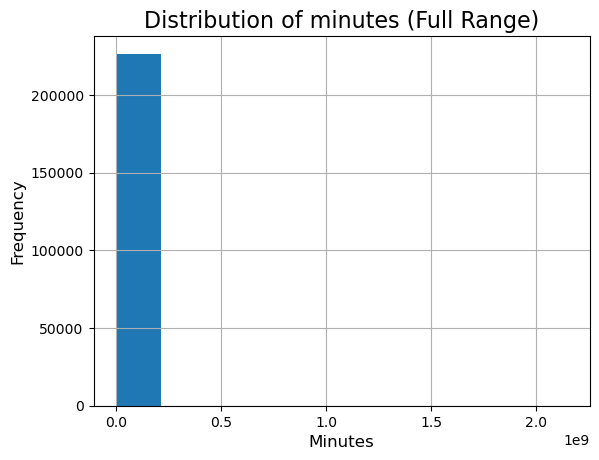

In [22]:
plt.title("Distribution of minutes (Full Range)", fontsize=16)
plt.xlabel("Minutes", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
recipe_df["minutes"].hist()

Since the minutes column is right-skewed, we will focus on the top 95th percentile of the original data

<Axes: title={'center': 'Distribution of minutes (top 95 percentile)'}, xlabel='Minutes', ylabel='Frequency'>

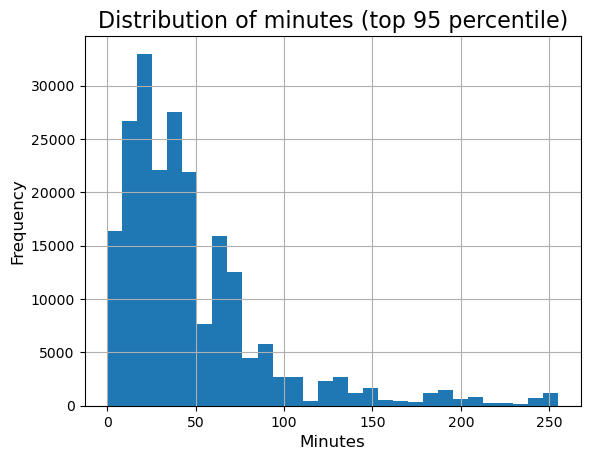

In [23]:
plt.title("Distribution of minutes (top 95 percentile)", fontsize=16)
plt.xlabel("Minutes", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
# get the 95 percentile
percentile_minutes_95 = recipe_df["minutes"].quantile(.95)
# filter the data upto top 95th percentile
recipe_df[recipe_df["minutes"] <= percentile_minutes_95]["minutes"].hist(bins=30)

Data points above the 95th percentile are considered outliers based on our design choice. We use this approach because of the following reasons:

* By removing the extreme outliers (above 255 minutes), the dataset's metrics are now more representative of the majority of the data
* The dataset contained exceptionally high values, such as 2,147,483,647. These values are so far beyond the general distribution that using Tukey’s Rule would likely still retain some of these extreme outliers, potentially skewing the analysis.
*  The data appeared heavily skewed to the right, making percentile-based thresholds (e.g., the 95th percentile) more practical for handling skewed distributions. Tukey's Rule can sometimes underperform when data is not symmetrically distributed.

In [24]:
# minutes outliers
minutes_outlier = recipe_df[recipe_df["minutes"] > percentile_minutes_95]

Now, we see that  summary statistics below suggest there are likely outliers in the `n_steps` and `n_ingredients` columns.

In [25]:
recipe_df[["n_steps", "n_ingredients"]].describe()

,n_steps,n_ingredients
count,226657.000000,226657.000000
mean,9.773927,9.054170
std,5.999824,3.740942
min,0.000000,1.000000
25%,6.000000,6.000000
50%,9.000000,9.000000
75%,12.000000,11.000000
max,145.000000,43.000000


We will carry out similar procedure of handling outliers for `n_steps` and `n_ingredients` columns in the dataframe.

In [26]:
# only include positive values
recipe_df = recipe_df[recipe_df["n_steps"] > 0]

<Axes: title={'center': 'Distribution of n_steps'}, xlabel='Number of Steps', ylabel='Frequency'>

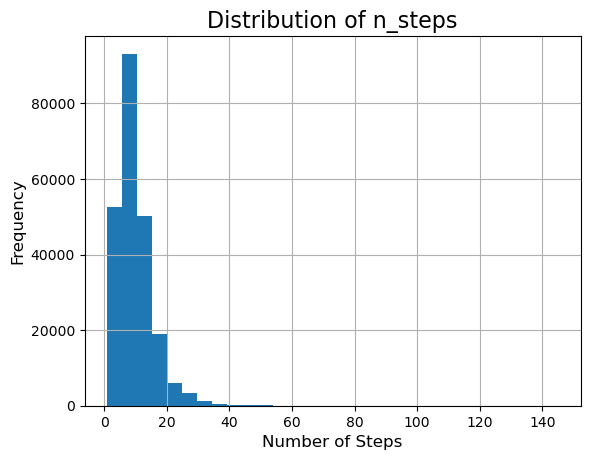

In [27]:
plt.title("Distribution of n_steps", fontsize=16)
plt.xlabel("Number of Steps", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
recipe_df["n_steps"].hist(bins=30)

In [28]:
percentile_num_steps_95 = recipe_df["n_steps"].quantile(0.95)

# n_steps outliers
n_steps_outlier = recipe_df[recipe_df["n_steps"] > percentile_num_steps_95]

<Axes: title={'center': 'Distribution of n_ingredients'}, xlabel='Number of Ingredients', ylabel='Frequency'>

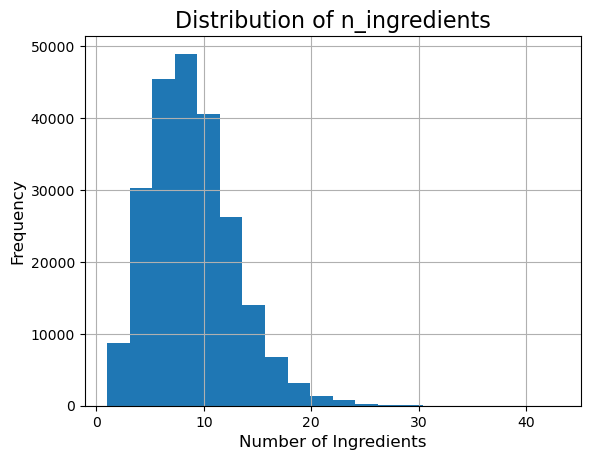

In [29]:
plt.title("Distribution of n_ingredients", fontsize=16)
plt.xlabel("Number of Ingredients", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
recipe_df["n_ingredients"].hist(bins=20)

In [30]:
percentile_n_ingredients_95 = recipe_df["n_ingredients"].quantile(0.95)

# n_ingredients outliers
n_ingredients_outlier = recipe_df[recipe_df["n_ingredients"] > percentile_n_ingredients_95]

With the outlier entries identified, the next step is to remove them. We'll first collect the indices of these outliers and then exclude them from the original DataFrame.

In [31]:
# Combine the indices of outliers from 'minutes', 'n_steps', and 'n_ingredients' columns
combined_indices = minutes_outlier.index.union(n_steps_outlier.index).union(n_ingredients_outlier.index)

# Drop
recipe_df.drop(index=combined_indices, inplace=True)

Next, we will load the second dataset into memory.

In [32]:
# second dataframe
users_df = pd.read_csv("C:/Users/pd006/Desktop/internship_search/machine_learning/Recipe-Recommender-System/data/RAW_interactions.csv")

Now let us explore this dataframe some more.

In [33]:
users_df.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [34]:
# dimensions
users_df.shape

(1132367, 5)

Like before, we will convert the date column to a datetime object.

In [35]:
users_df["date"] = pd.to_datetime(users_df["date"])

Next, let's focus on the most important column in this DataFrame: `rating`. So let's look at its distribution.

<Axes: title={'center': 'Distribution of rating'}, xlabel='Ratings', ylabel='Frequency'>

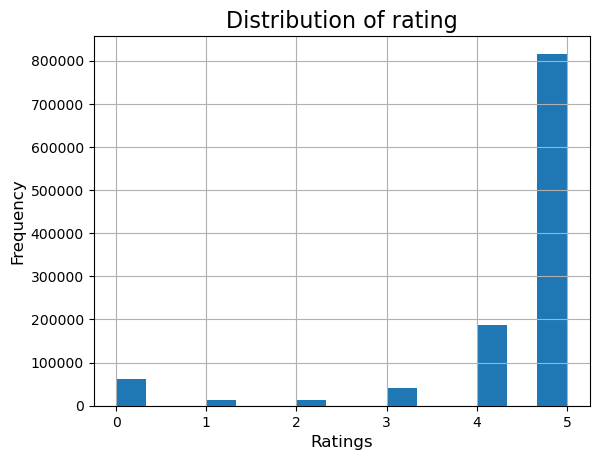

In [36]:
plt.title("Distribution of rating", fontsize=16)
plt.xlabel("Ratings", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
users_df["rating"].hist(bins=15)

Upon closely examining the reviews for entries with zero ratings, we found that they often included requests for more information, mentions of incomplete ingredients, or comments suggesting a derivative approach to the original recipe. We can see a glimpse of that below.

In [37]:
users_df[users_df["rating"] == 0].head()

,user_id,recipe_id,date,rating,review
6,124416,120345,2011-08-06,0,"Just an observation, so I will not rate. I fo..."
12,468945,134728,2008-02-20,0,Made my own buttermilk w/ vinegar and milk. U...
23,681408,225241,2008-03-14,0,This is a very good recipe. We also want to c...
39,2002068522,29093,2018-03-26,0,i made it and it was amazing
56,980899,79222,2010-10-18,0,"I used half cream and half 1% milk, added anot..."


Since our focus is on users who provided ratings for the recipes, we will exclude entries with zero ratings from our analysis.

In [38]:
# only include data points with positive ratings
users_df = users_df[users_df["rating"] != 0]

### Feature engineering

We will begin with the `recipe_df` DataFrame. The `nutrition` column contains values organized in the following order: calories (#), total fat (PDV), sugar (PDV), sodium (PDV), protein (PDV), saturated fat (PDV), and carbohydrates (PDV). We will create a new column for each value in the nutrition column. Afterward, we will drop the original nutrition column to avoid redundancy.

In [39]:
nutrition_info = ["calories", "total_fat", "sugar", "sodium", "protein", "saturated_fat", "carbohydrates"]

In [40]:
# create separate column for each element of each row of nutrition column.
for info in nutrition_info:
    idx = nutrition_info.index(info)
    recipe_df[info] = recipe_df["nutrition"].apply(lambda x: x[idx])

In [41]:
# drop
recipe_df.drop(columns=["nutrition"], axis=1, inplace=True)

Next, we turn our attention to the `submitted` column. Since it is already a datetime object, we will extract the day, month, and year into separate columns. Afterward, we will drop the original column to eliminate redundancy.

In [42]:
# get the month, day, year from the submitted column
recipe_df["day"] = recipe_df["submitted"].dt.day
recipe_df["month"] = recipe_df["submitted"].dt.month
recipe_df["year"] = recipe_df["submitted"].dt.year

# drop the submitted column
recipe_df.drop(columns=["submitted"], axis=1, inplace=True)

The `users_df` DataFrame also contains a column with datetime objects. We will apply the same steps as above: extracting the day, month, and year into separate columns and dropping the original column to avoid redundancy.

In [43]:
# we do the same for the date column in users_df.
users_df["day"] = users_df["date"].dt.day
users_df["month"] = users_df["date"].dt.month
users_df["year"] = users_df["date"].dt.year

# drop the date column
users_df.drop(columns=["date"], axis=1, inplace=True)

### Building dataset

We create a new DataFrame `users_recipe_rating` using only `recipe_id` and `rating` columns.

In [44]:
users_recipe_rating = users_df[["recipe_id", "rating"]].copy()

Next, we use `groupby()` method and aggregate `agg` with mutiple functions

In [45]:
users_recipe_rating = users_recipe_rating.groupby(["recipe_id"])["rating"].agg(["count", "mean"])

In [46]:
users_recipe_rating.reset_index(inplace=True)

To get an overview of the average rating for each recipe, we’ll group the merged dataset by recipe and calculate the mean rating. This will give us a single rating value per recipe, reflecting its popularity and user satisfaction, which is key for our recommendation system.

In [47]:
users_recipe_rating.head()

,recipe_id,count,mean
0,38,4,4.250000
1,39,1,3.000000
2,40,9,4.333333
3,41,2,4.500000
4,43,1,1.000000


In [48]:
# round to two decimal places
users_recipe_rating["mean"] = users_recipe_rating["mean"].round(2)

In [49]:
# rename columns
users_recipe_rating.rename(columns={"mean": "avg_rating", "count": "votes"}, inplace=True)

Now, we are ready to merge `recipe_df` and `users_recipe_rating` to create a new DataFrame called `food_df`.

In [50]:
food_df = pd.merge(recipe_df, users_recipe_rating, left_on="id", right_on="recipe_id")

Once the dataset is cleaned, it’s important to save it for further analysis. Maintaining clean datasets ensures they can be easily utilized during the exploratory data analysis (EDA) and modelling phase.

In [51]:
# Save as a pickle object in Python
recipe_df.to_pickle("C:/Users/pd006/Desktop/internship_search/machine_learning/Recipe-Recommender-System/data/recipe.pkl")
users_df.to_pickle("C:/Users/pd006/Desktop/internship_search/machine_learning/Recipe-Recommender-System/data/users.pkl")
food_df.to_pickle("C:/Users/pd006/Desktop/internship_search/machine_learning/Recipe-Recommender-System/data/food.pkl")

### Conclusion

During the data preprocessing phase of the recipe recommendation system, the following steps were carried out:
* Removed rows with missing values in the `name` and `description` columns.
* Checked for and removed duplicate rows. Split the `nutrition` column into separate columns for each nutrient (calories, fat, sugar, sodium, protein, saturated fat, carbohydrates).
* Extracted month and year from the `submitted` and `date` columns to create 4 new features.
* Merged the recipe and user interaction datasets.

With the datasets cleaned and processed, we can now move on to the next phase of the project: exploratory data analysis (EDA) and modeling.